# Medical Classification - Acute Inflammation
In this dataset we look to classify if the patient has 'inflammation of urinary bladder' or 'Nephritis of renal pelvis origin'. To solve this problem I would clean and split the dataset and then make sepearte models for the two conditions.

**Dataset:** Acute Inflammation from UCI ML repository

**Dataset Cited from:** J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive diagnosis of urinary system diseases,Artifical Inteligence and Security in Computing Systems, ACS'2002 9th International Conference Proceedings,Kluwer Academic Publishers,2003, pp. 41-51 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Pre-processing

In [2]:
df = pd.read_csv('diagnosis.data', sep='\t', encoding='UTF-16 LE', header=None)
df.columns = ['Temperature of Patient', 'Occurence of Nausea', 'Lumbar Pain', 'Urine Pushing', 'Micturition Pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']
df

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


##### Checking for any missing or misplaced values

In [3]:
df.describe()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120,120,120,120,120,120,120,120
unique,44,2,2,2,2,2,2,2
top,"37,0",no,yes,yes,no,no,no,no
freq,8,91,70,80,61,70,61,70


Switching 'yes' for 1 and 'no' for 0, to some ML algorithms such as KNN or Logistic Regression. 

In [4]:
df['Occurence of Nausea'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Lumbar Pain'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Urine Pushing'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Micturition Pains'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Burning of urethra, itch, swelling of urethra outlet'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Inflammation of urinary bladder'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Nephritis of renal pelvis origin'].replace(('yes', 'no'), (1, 0), inplace=True)

In [5]:
df.head()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",0,1,0,0,0,0,0
1,"35,9",0,0,1,1,1,1,0
2,"35,9",0,1,0,0,0,0,0
3,"36,0",0,0,1,1,1,1,0
4,"36,0",0,1,0,0,0,0,0


In [6]:
df['Temperature of Patient'] = df['Temperature of Patient'].str.replace(',', '.')
df['Temperature of Patient'] = pd.to_numeric(df['Temperature of Patient'])
df.dtypes

Temperature of Patient                                  float64
Occurence of Nausea                                       int64
Lumbar Pain                                               int64
Urine Pushing                                             int64
Micturition Pains                                         int64
Burning of urethra, itch, swelling of urethra outlet      int64
Inflammation of urinary bladder                           int64
Nephritis of renal pelvis origin                          int64
dtype: object

All datatypes are of the correct type, we will now split them and then standardize them. 

In [7]:
X = df.iloc[:, :-2]
y1 = df.iloc[:, -2] # Class 1
y2 = df.iloc[:, -1] # Class 2

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2)

scaler1 = StandardScaler()
X1_train[['Temperature of Patient']] = scaler1.fit_transform(X1_train[['Temperature of Patient']])
scaler2 = StandardScaler()
X2_train[['Temperature of Patient']] = scaler2.fit_transform(X2_train[['Temperature of Patient']])

C:\Users\zbtin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zbtin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\zbtin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Standardizing Temperature to have all variable on the same scale. Again this helps with ML algorithms that are based on distance and allow equal weightage to each feature to begin with. I chose to Standardize, this is because I'm assuming a normal distribution, which is what we see when we take temperatures of a large sample. 

**Source:** 'Normal and t Distributions' by Bret Hanlon and Bret Larget Department of Statistics University of Wisconsin—Madison October 11–13, 2011

In [9]:
X1_train.head()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of urethra, itch, swelling of urethra outlet"
102,1.266362,0,0,0,0,0
37,-0.743072,0,1,0,0,0
38,-0.743072,0,0,1,0,0
20,-0.966342,0,0,1,1,0
91,1.043092,1,1,0,1,0


In [10]:
X2_train.head()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of urethra, itch, swelling of urethra outlet"
40,-0.642656,0,1,0,0,0
90,1.078806,0,0,0,0,0
6,-1.364559,0,0,1,1,1
89,1.078806,1,1,1,1,1
77,0.745620,0,1,1,0,1


Data Preprocessing Complete

### Data Modelling
I'll be trying various ML algorithms and see which ones can be worked out. We would want to diagnose those who have the disease correctly. Since, The conditions we are trying to get our data to classify do not have very high fatality rates, we will not face complications in case of false-positive, and hence we would be looking more towards recall as our primary evaluation metric. 

We will work on each condition seperately, so let's run classification for 'Inflammation of urinary bladder' first

**Note:** This dataset is pretty small and has only a few features, instead of running GridSearchCV or RandomSearchCV for metaparameters (e.g. k for KNN), I will just tweak them manually and showcase the ones that I think provide the best estimate.

##### Algorithm 1: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
yhat = classifier.predict(X1_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [13,  0]], dtype=int64)

Logistic Regression is predicting all values as negative. Leading to correct negative predictions and incorrect postive ones, exactly the opposite of what we would want.

##### Algorithm 2: K-NN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X1_train, y1_train)

yhat = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [13,  0]], dtype=int64)

##### Algorithm 3a: SVM (kernel = linear)

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X1_train, y1_train)

yhat = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [ 0, 13]], dtype=int64)

In [31]:
confusion_matrix(y1_train, classifier.predict(X1_train))

array([[50,  0],
       [ 0, 46]], dtype=int64)

We see a 100% accuracy and 100% recall through the SVM classifier using a linear kernal. This is usually alarming but since the dataset is only 120 data-points this is something that is achievable.

I'll try a couple other algorithms to see how they perform as well.

##### Algorithm 3b: SVC (kernel = rbf)

In [32]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X1_train, y1_train)

yhat = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [13,  0]], dtype=int64)

##### Algorithm 3c: SVC (Kernel = poly)

In [33]:
classifier = SVC(kernel = 'poly')
classifier.fit(X1_train, y1_train)

yhat = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [13,  0]], dtype=int64)

##### Algorithm 4: Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)

yhat = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [13,  0]], dtype=int64)

##### Algorithm 5: Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X1_train, y1_train)

yhat = classifier.predict(X1_test)

cm = confusion_matrix(y1_test, yhat)
cm # Test Score

array([[11,  0],
       [ 0, 13]], dtype=int64)

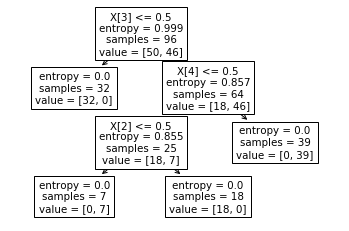

In [36]:
from sklearn import tree

tree.plot_tree(classifier)
plt.show()

In the tree above, we can see that those who show signs of Urine Pushing tend to be suffering from Inflammation. If you are not urine pushing, then we look at micturation pains, if you do not have any micturation pains, then you do not have inflammation. If you are not urine pushing, but have micturation pains, we look to lumbar pain, which if exists points to inflammation, otherwise not. 

So we can say that given this data, we see the following rules:
- If you have Urine Pushing then you have Inflammation of urinary bladder
- If you do not have Urine Pushing or Micturation pains then you do NOT have inflammation
- If you do not have Urine Pushing, but have Micturation and Lumbar Pains then you have inflammation 
- If you have Micturation Pains, but no Urine pushing and Lumbar Pains then you do NOT have inflammation

We see again a 100% accuracy and 100% recall, this time with a decision tree classifier. Since out Decision Tree is so adept, we do not need to use any ensemble techniques.

Now let's create a summary.

In [22]:
evaluators = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
lr = [0.52, 0, 0, 0]
knn = [0.52, 0, 0, 0]
lsvc = [1, 1, 1, 1]
rsvc = [0.52, 0, 0, 0]
psvc = [0.52, 0, 0, 0]
nb = [0.52, 0, 0, 0]
dt = [1, 1, 1, 1]
index = ['Logistic Regression', 'KNN', 'Linear SVC', 'RBF SVC', 'Poly SVC', 'Naive Bayes', 'Decision Tree']
pd.DataFrame([lr, knn, lsvc, rsvc, psvc, nb, dt], columns = evaluators, index=index)

,Accuracy,Recall,Precision,F1-Score
Logistic Regression,0.52,0,0,0
KNN,0.52,0,0,0
Linear SVC,1.00,1,1,1
RBF SVC,0.52,0,0,0
Poly SVC,0.52,0,0,0
Naive Bayes,0.52,0,0,0
Decision Tree,1.00,1,1,1


Now let's try to classify 'Nephritis of renal pelvis origin'

##### Logistic Regression

In [23]:
classifier = LogisticRegression()
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[ 0, 12],
       [ 0, 12]], dtype=int64)

##### K-NN

In [40]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[ 0, 15],
       [ 0,  9]], dtype=int64)

##### Linear SVC

In [41]:
classifier = SVC(kernel = 'linear')
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[ 0, 15],
       [ 0,  9]], dtype=int64)

##### rbf SVC

In [42]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[15,  0],
       [ 9,  0]], dtype=int64)

##### poly SVC

In [43]:
classifier = SVC(kernel = 'poly')
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[ 4, 11],
       [ 4,  5]], dtype=int64)

##### Naive Bayes

In [44]:
classifier = GaussianNB()
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[15,  0],
       [ 4,  5]], dtype=int64)

##### DecisionTree 

In [45]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[8, 7],
       [0, 9]], dtype=int64)

We see varying degrees of success in our classification. Currently, the DecisionTree method seems to be doing the best as it has positively identified all the positive cases, however it has a meager 53.3% success in determining negative cases. This is bad as many people would need to be retested, however it still catches 100% of all our cases. 

##### RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X2_train, y2_train)
yhat = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, yhat)
cm # Test Score

array([[15,  0],
       [ 0,  9]], dtype=int64)

Here we see that power of RandomForest, by combining multiple Decision Tree models we have a model that gives us 100% accuracy and 100% recall. 

In [62]:
evaluators = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
lr = [0.375, 1, 0.375, 0.546]
knn = [0.375, 1, 0.375, 0.546]
lsvc = [0.375, 1, 0.375, 0.546]
rsvc = [0.625, 0, 0, 0]
psvc = [0.375, 0.3125, 0.55, 0.399]
nb = [0.83, 1, 0.55, 0.709]
dt = [0.708, 0.5625, 1, 0.72]
rf = [1, 1, 1, 1]
index = ['Logistic Regression', 'KNN', 'Linear SVC', 'RBF SVC', 'Poly SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest']
pd.DataFrame([lr, knn, lsvc, rsvc, psvc, nb, dt, rf], columns = evaluators, index=index)

,Accuracy,Recall,Precision,F1-Score
Logistic Regression,0.375,1.0000,0.375,0.546
KNN,0.375,1.0000,0.375,0.546
Linear SVC,0.375,1.0000,0.375,0.546
RBF SVC,0.625,0.0000,0.000,0.000
Poly SVC,0.375,0.3125,0.550,0.399
Naive Bayes,0.830,1.0000,0.550,0.709
Decision Tree,0.708,0.5625,1.000,0.720
Random Forest,1.000,1.0000,1.000,1.000
